# Google Play Store Exploratory Data Analysis

Congratulations! You've been hired by APPDEV Inc. as their latest Data Science Intern, to help them derive insights from a Google Play Store dataset they've provided, in order to help them know what type of apps they can make next, that will fetch them lots of users and in turn, more revenue.

Your tasks are very simple, as they have been very much outlined for you...
all you just have to do is follow them intuitively, and you might wanna take some notes along the way.

Good luck!

In [1]:
# Run this cell and the next to install and import the required packages.
! pip install pandas matplotlib seaborn scipy

In [2]:
# import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Time to explore your data

1. read in the CSV file
2. print the first 10 rows

In [3]:
# Code here...

gpse = pd.read_csv('googleplaystore.csv')

print(gpse.head(10))

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                         Paper flowers instructions  ART_AND_DESIGN     4.4   
6            Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN     3.8   
7                                   Infinite Painter  ART_AND_DESIGN     4.1   
8                               Garden Coloring Book  ART_AND_DESIGN     4.4   
9                      Kids Paint Free - Drawing Fun  ART_AND_DESIGN     4.7   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1

3. check out more `info` about the data. 

In [4]:
# Code here...
gpse.info

<bound method DataFrame.info of                                                      App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE

4. seems like there are some missing values, find out how many there are...

In [5]:
# Code here...

gpse.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

5. are there `duplicated` values as well?

(*take some notes here*); No duplicate values

In [6]:
# Code here...

gpse.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Length: 10841, dtype: bool

# Now, let's clean the dirty data

Natural instinct is we drop the rows containing the missing values, right?
but we will be losing lots of data if we do that, let's try this instead:

1. define a threshold that won't allow lose of data above 5% of the whole dataset.
2. fetch the columns with missing values less than our set threshold into a list.
3. drop the missing values in the rows of the collected columns from the original dataset.
4. drop the duplicates as well, if there are any.
5. now, let's recheck the `info` of our data.

In [7]:
# Code here...

threshold = 0.05 * len(gpse)

col_below_threshold = [col for col in gpse.columns if gpse[col].isna().sum() < threshold]

gpse_cleaned = gpse.dropna(subset=col_below_threshold)

gpse_cleaned = gpse_cleaned.drop_duplicates()

print(gpse_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
Index: 10346 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10346 non-null  object 
 1   Category        10346 non-null  object 
 2   Rating          8886 non-null   float64
 3   Reviews         10346 non-null  object 
 4   Size            10346 non-null  object 
 5   Installs        10346 non-null  object 
 6   Type            10346 non-null  object 
 7   Price           10346 non-null  object 
 8   Content Rating  10346 non-null  object 
 9   Genres          10346 non-null  object 
 10  Last Updated    10346 non-null  object 
 11  Current Ver     10346 non-null  object 
 12  Android Ver     10346 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


our data doesn't seem to look much as if we picked it from a dump site like it did earlier, right?
well, we are not there yet, as we still have some missing data in the `Rating` column, let's see how we can fill that void and make our data as white as snow, so, stay with me (^_^)...

6. `group` the data `by` the `Installs` column and compute the `median` of the `Rating` column, store the result as a dictionary.
7. on the original dataset, `fill` the missing values of the `Rating` column by `mapping` the dictionary on the `Installs` column.
8. if you check our data now, you'll realize there are still some missing values as we couldn't fill them all, but not to worry, you can `drop` these ones, since they are not much.
9. recheck our data now, looks perfect, doesn't it?

(*take some notes here*)

In [8]:
# Code here...

rating_medians = gpse.groupby('Installs')['Rating'].median().to_dict()

gpse['Rating'] = gpse['Installs'].map(rating_medians).where(gpse['Rating'].isna(), gpse['Rating'])

gpse_cleaned = gpse.dropna(subset=['Rating'])

print(gpse_cleaned.head(10))
print(gpse_cleaned.info())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                         Paper flowers instructions  ART_AND_DESIGN     4.4   
6            Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN     3.8   
7                                   Infinite Painter  ART_AND_DESIGN     4.1   
8                               Garden Coloring Book  ART_AND_DESIGN     4.4   
9                      Kids Paint Free - Drawing Fun  ART_AND_DESIGN     4.7   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1

# Let's perform some transformation magic

If you take a look at the first few rows of our dataset, you'll notice that the `Installs` column has commas and plus signs, they should be numbers, but when you check the data type of this column and that of `Reviews`, you see that they are objects, we need to make them integers, as we will need them later:

1. replace the comma sign in the `Installs` column with nothing.
2. do the same for the plus sign.
3. now, convert the data type of the `Installs` column to integer.
4. do the same for the `Reviews` column.
5. recheck the original dataset to see if the changes have taken place.

(*you might wanna take some notes here*)

In [9]:
# Code here...

gpse_cleaned['Installs'] = gpse_cleaned['Installs'].str.replace(',','')

gpse_cleaned['Installs'] = gpse_cleaned['Installs'].str.replace('+','')

gpse_cleaned['Installs'] = pd.to_numeric(gpse_cleaned['Installs'], errors='coerce') 

gpse_cleaned['Reviews'] = gpse_cleaned['Reviews'].str.replace(',','')

gpse_cleaned['Reviews'] = pd.to_numeric(gpse_cleaned['Reviews'], errors='coerce') 

print(gpse_cleaned.head(5))
print(gpse_cleaned.info())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

    Reviews  Size    Installs  Type Price Content Rating  \
0     159.0   19M     10000.0  Free     0       Everyone   
1     967.0   14M    500000.0  Free     0       Everyone   
2   87510.0  8.7M   5000000.0  Free     0       Everyone   
3  215644.0   25M  50000000.0  Free     0           Teen   
4     967.0  2.8M    100000.0  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pr

C:\Users\Jenny Whyte\AppData\Local\Temp\ipykernel_14420\2576866771.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpse_cleaned['Installs'] = gpse_cleaned['Installs'].str.replace(',','')
C:\Users\Jenny Whyte\AppData\Local\Temp\ipykernel_14420\2576866771.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpse_cleaned['Installs'] = gpse_cleaned['Installs'].str.replace('+','')
C:\Users\Jenny Whyte\AppData\Local\Temp\ipykernel_14420\2576866771.py:7: SettingWithCopyWarning: 
A value is trying to be set on a

# Time for some Visual Scenes

APPDEV Inc. wants to know what category has the most apps and which has the least...

Let's explore some distributions on the App Categories:

1. create a histogram plot on the `Category` column.
2. label the x-axis: `Category of Apps on PlayStore`, y-axis: `Count of Apps in each Category`, title: `Distribution of App Categories`.
3. show the plot. 

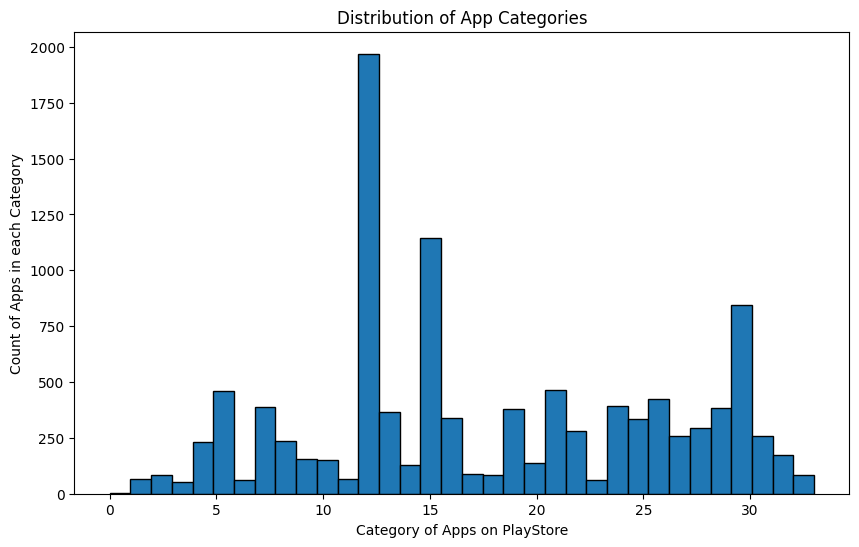

In [10]:
# Code here...

category_codes = gpse_cleaned['Category'].astype('category').cat.codes

plt.figure(figsize=(10,6))  
plt.hist(category_codes, bins=len(gpse_cleaned['Category'].unique()), edgecolor='black')

plt.xlabel('Category of Apps on PlayStore')
plt.ylabel('Count of Apps in each Category')
plt.title('Distribution of App Categories')

plt.show()



oh my..., that doesn't look like much, we can't derive good insights from it, looks kinda ugly, right?, especially the x-axis, urgh!
well, let's add some cosmetics:

1. copy the code from the previous cell into the next.
2. this time, change the plot into a `countplot` from the seaborn package.
3. add a figure size of 10 by 6, to make it look bigger, do this at the very first line of the cell.
4. you can add `grid` lines, to add a touch of accuracy in reading.
5. the labels stay the same, but add an `xticks` with a `rotation` of 90 degrees.
6. let's add some coloration to the `countplot` to improve the beauty: `hue='Category'`.
7. now, let's behold the beauty.

(*take some notes here*)

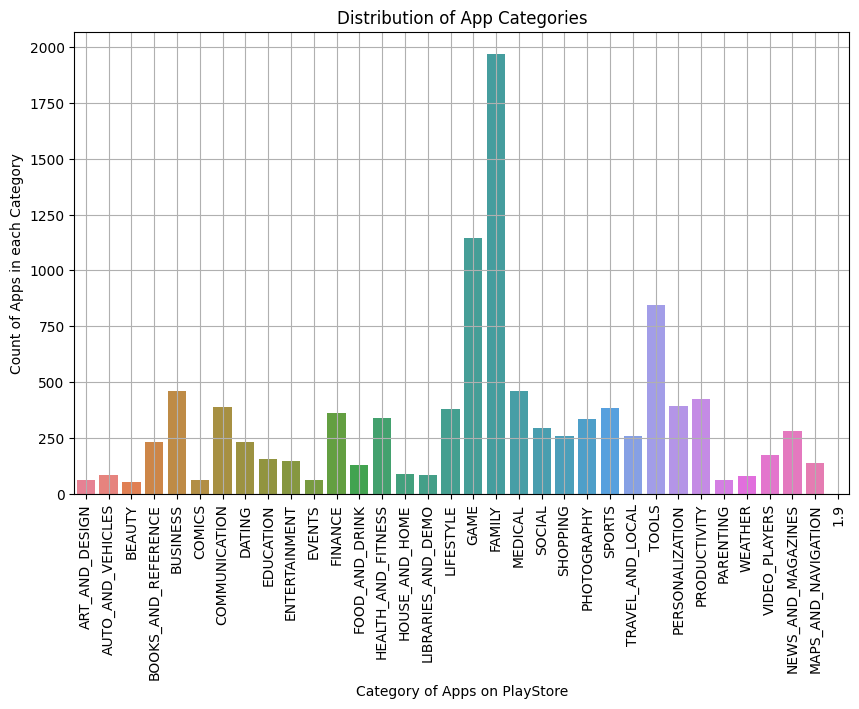

In [11]:
# Code here...

plt.figure(figsize=(10,6))

sns.countplot(x='Category', data=gpse_cleaned, hue='Category')

plt.grid(True)

plt.xlabel('Category of Apps on PlayStore')

plt.ylabel('Count of Apps in each Category')

plt.title('Distribution of App Categories')

plt.xticks(rotation=90)

plt.show()

...looked really good, right?

now, APPDEV Inc. wants to know if there is any correlation between ratings and reviews... 

let's perform couple more visuals, this time, on the relationship between the `Reviews` and `Rating`:

1. set the figure size like you did earlier.
2. construct the `Rating` column against the `Reviews` column on a `scatterplot`.
3. label the x-axis: `Number of Reviews` and the title: `Relationship between Reviews and Ratings`.
4. now, `show` your plot.

(*take some notes here*)

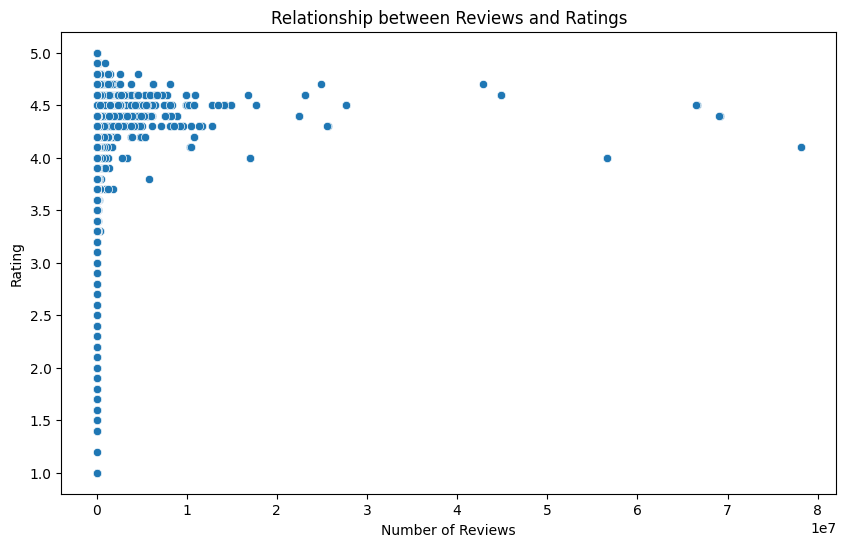

In [12]:
# Code here...

plt.figure(figsize=(10,6))

sns.scatterplot(x='Reviews', y='Rating', data=gpse_cleaned)

plt.xlabel('Number of Reviews')

plt.ylabel('Rating')

plt.title('Relationship between Reviews and Ratings')

plt.show()

...that was owkae.

moving on, APPDEV Inc. wants to know which category has more installs...

let's find out the distribution of `Installs` across the Categories:

1. use a `boxplot` to construct the `Installs` column against the `Category` column.
2. label the x-axis: `Category of Apps on PlayStore`, y-axis: `Amount of Installs in each Category`, title: `Distribution of Installs across Categories`.
3. show the plot. 

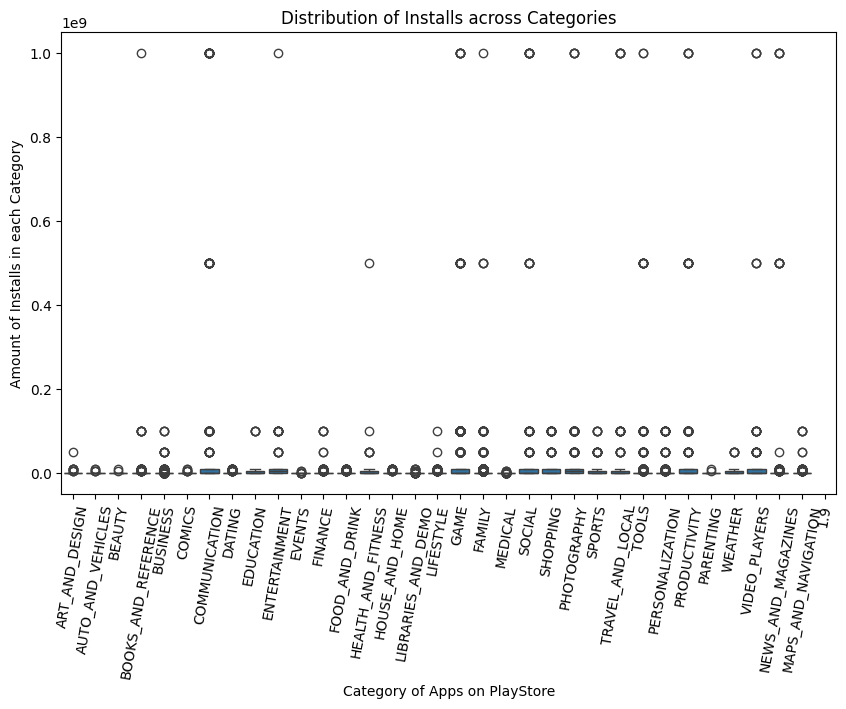

In [13]:
# Code here...

plt.figure(figsize=(10,6))

sns.boxplot(x='Category', y='Installs', data=gpse_cleaned)

plt.xlabel('Category of Apps on PlayStore')

plt.ylabel('Amount of Installs in each Category')

plt.title('Distribution of Installs across Categories')

plt.xticks(rotation=80)

plt.show()

what is this? (\*o*)...

I bet that was the expression on your face.

yeah, it looked ridiculous, right?, even worse than the last one, we definitely can't make sense of this and the board might have a heart attack if we present this to them...

so many outliers, let's fix that:

1. create another column, in the original dataset, called `Installs_log`, perform a logarithmic computation on the `Installs` column using the `log()` method from the numpy package and save to the new column.
2. subset both columns from the original dataset to view the first 5 rows side by side.

In [14]:
# Code here...

gpse_cleaned['Installs_log'] = np.log(gpse_cleaned['Installs'])

print(gpse_cleaned.head(5))

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

    Reviews  Size    Installs  Type Price Content Rating  \
0     159.0   19M     10000.0  Free     0       Everyone   
1     967.0   14M    500000.0  Free     0       Everyone   
2   87510.0  8.7M   5000000.0  Free     0       Everyone   
3  215644.0   25M  50000000.0  Free     0           Teen   
4     967.0  2.8M    100000.0  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pr

C:\Users\Jenny Whyte\AppData\Local\Temp\ipykernel_14420\2485462438.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpse_cleaned['Installs_log'] = np.log(gpse_cleaned['Installs'])


now, let's construct the `boxplot` again, this time, with beauty:

1. copy the code from the previous cell into the next.
2. add a figure size of 10 by 6
3. use `Installs_log` instead of `Installs`.
4. add some coloration to the plot using the `Category` column.
5. the labels stay the same, but make the y-axis label: `Log-Amount of Installs in each Category` and add a `rotation` of 90 degrees.
6. now, let's behold the beauty.

(*you might wanna take some notes here*)

C:\Users\Jenny Whyte\AppData\Local\Temp\ipykernel_14420\363581401.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpse_cleaned['Installs_log'] = np.log(gpse_cleaned['Installs'])


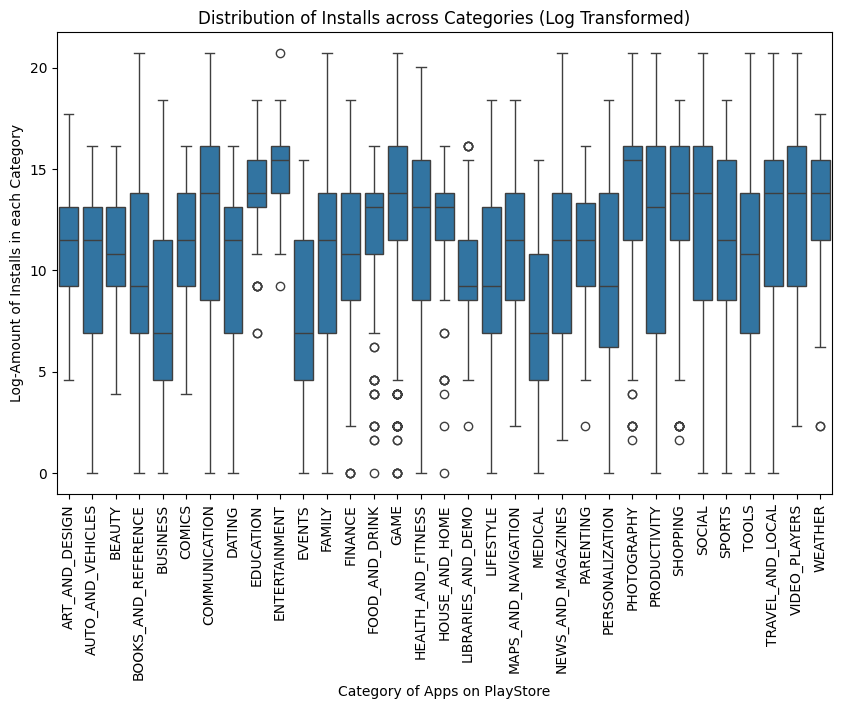

In [15]:
# Code here...

gpse_cleaned['Installs_log'] = np.log(gpse_cleaned['Installs'])

gpse_cleaned = gpse_cleaned.dropna(subset=['Category', 'Installs_log'])

gpse_cleaned = gpse_cleaned.loc[:, ~gpse_cleaned.columns.duplicated()]

gpse_cleaned['Category'] = gpse_cleaned['Category'].astype('category')

gpse_cleaned.shape

gpse_cleaned.dtypes

plt.figure(figsize=(10,6))

sns.boxplot(x='Category', y='Installs_log', data=gpse_cleaned)

plt.xlabel('Category of Apps on PlayStore')

plt.ylabel('Log-Amount of Installs in each Category')

plt.title('Distribution of Installs across Categories (Log Transformed)')

plt.xticks(rotation=90)

plt.show()

...wow, looks perfect, doesn't it? (^_^).

# We have an Hypothesis...

A thought just crossed the MD's mind, he's curious to know if there's any difference in the ratings of paid apps vs. free apps, he's come to your desk and asked you to get rid of his curiousity... 

how do we go about this?, let's find out:

1. import `ttest_ind` from `stats` module of the `scipy` package, so we can find out what's up between these `two independent` variables.
2. subset the original dataset to filter out the free apps from the `Type` column, save the new DataFrame in `free_apps`.
3. do the same for paid apps, save to `paid_apps`.

In [16]:
# Code here...

from scipy.stats import ttest_ind

free_apps = gpse_cleaned[gpse_cleaned['Type'] == 'Free']

# Step 3: Subset to filter out paid apps
paid_apps = gpse_cleaned[gpse_cleaned['Type'] == 'Paid']

# Display the first few rows of each DataFrame to verify
print("Free Apps DataFrame:")
print(free_apps.head())
print("\nPaid Apps DataFrame:")
print(paid_apps.head())

Free Apps DataFrame:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

    Reviews  Size    Installs  Type Price Content Rating  \
0     159.0   19M     10000.0  Free     0       Everyone   
1     967.0   14M    500000.0  Free     0       Everyone   
2   87510.0  8.7M   5000000.0  Free     0       Everyone   
3  215644.0   25M  50000000.0  Free     0           Teen   
4     967.0  2.8M    100000.0  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0 

you've been provided an alpha value and test result variables have been set for you, now:

1. conduct the test, using the `Rating` column of the free apps against that of the paid apps
2. create a result dictionary that takes the `p_value` as a key, then the value should be `Reject null hypothesis: There is a significant difference in ratings.` if the p_value was less than the alpha value, or `Failed to reject null hypothesis: There is no significant difference in ratings.` if not.
3. print the result.

(*take some notes here*)

In [17]:
# Code here...

free_apps = gpse_cleaned[gpse_cleaned['Type'] == 'Free']
paid_apps = gpse_cleaned[gpse_cleaned['Type'] == 'Paid']

# Given alpha value
alpha = 0.05  # Example alpha value

# Step 1: Conduct the t-test
t_stat, p_value = ttest_ind(free_apps['Rating'], paid_apps['Rating'])

# Step 2: Create the result dictionary
result = {
    'p_value': p_value,
    'result': 'Reject null hypothesis: There is a significant difference in ratings.' if p_value < alpha 
              else 'Failed to reject null hypothesis: There is no significant difference in ratings.'
}

# Step 3: Print the result
print("Test Statistic:", t_stat)
print("P-Value:", p_value)
print("Result:", result['result'])

Test Statistic: -6.650367465405467
P-Value: 3.064556647289529e-11
Result: Reject null hypothesis: There is a significant difference in ratings.


# Well Done!

Wow, great job so far...
you've really done well.

but, it's not over... just one last thing tho:

* now that you've explored, cleaned and derived some insights from the data, it's time for you to present what you've found
* you have the whole of APPDEV Inc. in front of you, based on the notes you've taken, tell them a story to remember, one that they can make informed decision from.

Good luck! (^_^)